<a href="https://colab.research.google.com/github/khodid/2021WirelessCommunication/blob/main/%5B2021WC%5D_HW4_ALOHA_G_Sdiagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021 무선통신공학 과제4

>제출일: 2021년 6월 4일 (오후 6시 마감)  
>성능평가 대상: Pure Aloha 또는 Slotted Aloha의 G-S 관계를 얻는 프로그램  
>보고서 형식:  
>- 학번, 이름, 그래프  
>- 본인의 구현방법과 성능평가 분석 보고서: 폰트 10의 순수한 텍스트로 2페이지  이상
>-  가장 뒤 프로그램 코드:  최종 출력으로 G값과 S 값을 보여주는 코드 (예: G = [0, 0.1, ... 3.0], S = [0, 0.1, ... 0.05])



> 지수분포 생성 방법
1. Matlab으로 구현하는 경우:
 - exprnd() 함수를 사용하여 지수 분포 함수 발생시킴 (함수에 사용하는 매개인자는 평균 값임. 즉, μ = 1/λ)  
>2. 위 함수가 지원되지 않는다면 다음의 Inverse Transformation Method 사용
< Inverse Transformation Method에 의한 지수 분포 생성 방법>
λ의 발생빈도(packets/s)를 가진 지수분포 생성 알고리즘  
 - (1) [0, 1] 사이에서 난수 U 생성  
 - (2) 지수분포를 따르는 Random variable X 생성: X = -ln(U) / λ    

> \* 지수분포 샘플 생성 후 실제 지수분포를 따르는지 확인할 것.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# [HW4] >> Plot G-S diagram of 'pure ALOHA' and 'slotted ALOHA' <<

lam = 0.1;      # packets per second
tau = 1e-3;     # packet transmission time
G = [];         # number of transmission attempt per tau sec
S = [];         # number of transmission success per tau sec

# 지수 분포 생성

In [3]:
x = np.random.exponential(1/lam, N)

In [14]:
np.cumsum(x)[-1]

10103.103362775102

In [4]:
x.shape

(1000,)

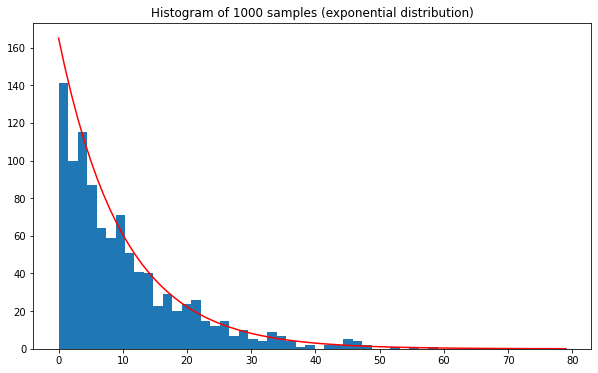

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(x, bins = 40)
plt.plot(1650*lam*np.exp(-np.arange(0, 80)*lam), 'r') # 분포를 더 명확하게 보여주기 위해서.
plt.title(f'Histogram of {N} samples (exponential distribution)')
plt.show()

# pure ALOHA

- S = $Ge^{-2G}$
- 관찰시간 T 동안
    - 발생 패킷 수 N
    - 성공 패킷 수 m (성공 기준: 앞뒤로 2tau 확보)
    - G = $\frac{N}{T}\tau$
    - S = $\frac{m}{T}\tau$
- $\lambda$ 값에 대해서 sweep을 해야 함

In [58]:
l = np.linspace(0, 350, 50)
len(l)

50

In [111]:
# 
pure_G = []
pure_S = []
tau = 1e-2
T = 50
for lam in l:
    exprand = np.random.exponential(1/lam, 50000)       # 패킷 간의 시간 간격 by 난수 생성
    packet = np.cumsum(exprand)                         # 0초에서부터의 시간 간격 by 누적합
    N = np.count_nonzero(packet<T)                      # T 시간 내에 발생한 패킷 수
    m = np.count_nonzero((packet<T)&(exprand>2*tau))    # T 시간 내에 발생한 패킷 중 패킷 간 시간 간격이 2 tau 이하인 것
    pure_G.append(N/T*tau)
    pure_S.append(m/T*tau)
print(f"마지막 패킷 도달 시간: {packet[-1]} \t N = {N} \t m={m}")

마지막 패킷 도달 시간: 143.04987350229024 	 N = 17389 	 m=21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


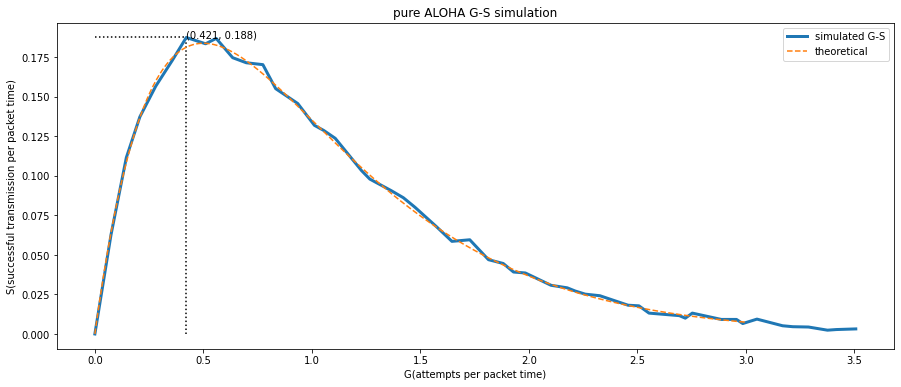

In [107]:
plt.figure(figsize=(15, 6))

# 그래프 그리기
plt.plot(pure_G, pure_S, linewidth = 3,label = 'simulated G-S')
plt.plot(np.linspace(0, 3, 1000), np.linspace(0, 3, 1000)*np.exp(-2*np.linspace(0, 3, 1000)),'--',label = 'theoretical')

# 그래프 꾸미기
plt.ylabel('S(successful transmission per packet time)')
plt.xlabel('G(attempts per packet time)')

# 최대점 구하기
y_max =  max(pure_S)
x_max = pure_G[pure_S.index(y_max)]

# 최대점 표시
plt.hlines(y=y_max, xmin=0, xmax=x_max, linestyles=':')
plt.vlines(x=x_max, ymin=0, ymax=y_max, linestyles=':')
plt.text(x = x_max, y=y_max, s=f'({x_max:.3f}, {y_max:.3f})')

plt.title('pure ALOHA G-S simulation')
plt.legend()

# Slotted ALOHA

In [110]:
slotted_G = []
slotted_S = []
tau = 1e-2
T = 50
for lam in l:
    exprand = np.random.exponential(1/lam, 50000)       # 패킷 간의 시간 간격 by 난수 생성
    packet = np.cumsum(exprand)                         # 0초에서부터의 시간 간격 by 누적합
    N = np.count_nonzero(packet<T)                      # T 시간 내에 발생한 패킷 수
    m = np.count_nonzero((packet<T)&(exprand>tau))      # T 시간 내에 발생한 패킷 중 패킷 간 시간 간격이 tau 이하인 것
    slotted_G.append(N/T*tau)
    slotted_S.append(m/T*tau)
print(f"마지막 패킷 도달 시간: {packet[-1]} \t N = {N} \t m={m}")

마지막 패킷 도달 시간: 143.48166994779936 	 N = 17444 	 m=527


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


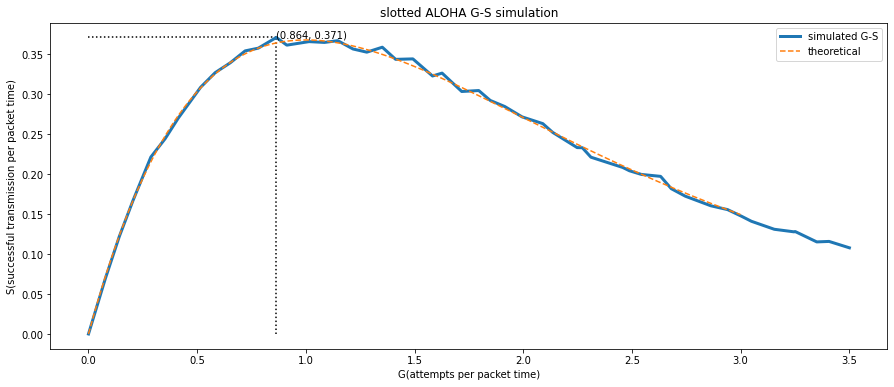

In [102]:
plt.figure(figsize=(15, 6))

# 그래프 그리기
plt.plot(slotted_G, slotted_S, linewidth = 3,label = 'simulated G-S')
plt.plot(np.linspace(0, 3, 1000), np.linspace(0, 3, 1000)*np.exp(-np.linspace(0, 3, 1000)),'--',label = 'theoretical')

# 그래프 꾸미기
plt.ylabel('S(successful transmission per packet time)')
plt.xlabel('G(attempts per packet time)')

# 최대점 구하기
y_max =  max(slotted_S)
x_max = slotted_G[slotted_S.index(y_max)]

# 최대점 표시
plt.hlines(y=y_max, xmin=0, xmax=x_max, linestyles=':')
plt.vlines(x=x_max, ymin=0, ymax=y_max, linestyles=':')
plt.text(x = x_max, y=y_max, s=f'({x_max:.3f}, {y_max:.3f})')

plt.title('slotted ALOHA G-S simulation')
plt.legend()

# 같이 그려서 비교하기

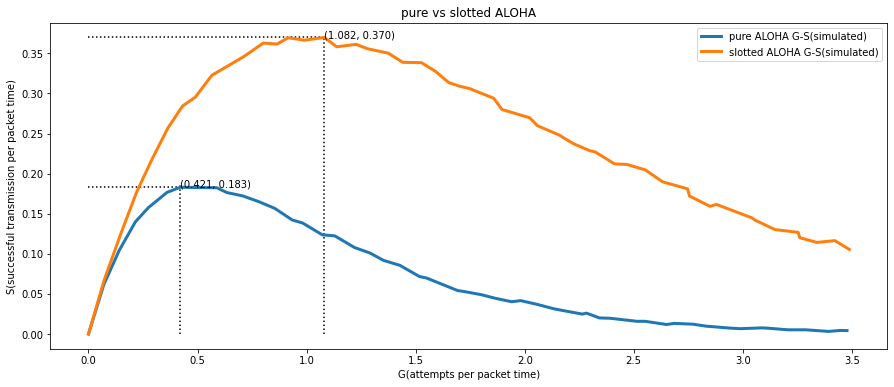

In [113]:
plt.figure(figsize=(15, 6))

# 그래프 그리기
plt.plot(pure_G, pure_S, linewidth = 3,label = 'pure ALOHA G-S(simulated)')

# 최대점 구하기
pure_y_max =  max(pure_S)
pure_x_max = pure_G[pure_S.index(pure_y_max)]

# 최대점 표시
plt.hlines(y=pure_y_max, xmin=0, xmax=pure_x_max, linestyles=':')
plt.vlines(x=x_max, ymin=0, ymax=y_max, linestyles=':')
plt.text(x = pure_x_max, y=pure_y_max, s=f'({pure_x_max:.3f}, {pure_y_max:.3f})')

# 그래프 그리기
plt.plot(slotted_G, slotted_S, linewidth = 3,label = 'slotted ALOHA G-S(simulated)')

# 그래프 꾸미기
plt.ylabel('S(successful transmission per packet time)')
plt.xlabel('G(attempts per packet time)')

# 최대점 구하기
s_y_max =  max(slotted_S)
s_x_max = slotted_G[slotted_S.index(s_y_max)]

# 최대점 표시
plt.hlines(y=s_y_max, xmin=0, xmax=s_x_max, linestyles=':')
plt.vlines(x=s_x_max, ymin=0, ymax=s_y_max, linestyles=':')
plt.text(x = s_x_max, y=s_y_max, s=f'({s_x_max:.3f}, {s_y_max:.3f})')

plt.title('pure vs slotted ALOHA')
plt.legend()

G, S값 보여주기

In [118]:
print('<< pure ALOHA >>')
print(f'G :', ' '.join(f"{x:.3f}" for x in pure_G))
print(f'S :', ' '.join(f"{x:.3f}" for x in pure_S))
print()
print('<< slotted ALOHA >>')
print(f'G :', ' '.join(f"{x:.3f}" for x in slotted_G))
print(f'S :', ' '.join(f"{x:.3f}" for x in slotted_S))

<< pure ALOHA >>
G : 0.000 0.070 0.140 0.215 0.275 0.360 0.421 0.507 0.588 0.634 0.707 0.783 0.854 0.934 0.982 1.072 1.129 1.220 1.290 1.353 1.428 1.518 1.550 1.692 1.725 1.801 1.864 1.940 1.982 2.062 2.137 2.264 2.283 2.343 2.391 2.514 2.552 2.650 2.686 2.772 2.830 2.948 2.990 3.086 3.117 3.207 3.289 3.394 3.447 3.478
S : 0.000 0.061 0.104 0.140 0.158 0.177 0.183 0.183 0.182 0.176 0.172 0.165 0.157 0.142 0.138 0.124 0.122 0.108 0.101 0.092 0.086 0.072 0.070 0.054 0.053 0.049 0.045 0.040 0.042 0.037 0.031 0.025 0.026 0.020 0.020 0.016 0.016 0.012 0.013 0.012 0.010 0.007 0.007 0.008 0.007 0.005 0.005 0.003 0.004 0.004

<< slotted ALOHA >>
G : 0.000 0.072 0.147 0.220 0.288 0.364 0.432 0.489 0.566 0.646 0.710 0.802 0.865 0.915 0.991 1.082 1.138 1.227 1.279 1.375 1.441 1.527 1.592 1.652 1.701 1.746 1.858 1.896 2.023 2.058 2.157 2.223 2.296 2.323 2.412 2.469 2.553 2.632 2.747 2.756 2.850 2.879 3.042 3.056 3.148 3.254 3.262 3.339 3.422 3.489
S : 0.000 0.068 0.124 0.176 0.216 0.257 0.284 0.29